In [1]:
import pandas as pd
import geopandas as gpd

In [4]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Journalists Killed between 1992 and 2023.csv')

In [5]:
df.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,lastStatus,typeOfDeath,status,employedAs,organizations,jobs,coverage,mediums,country,location,region,state,locality,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Shaabiya,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Watan,NaN,NaN,NaN,Iraq,an area southwest of Kirkuk,NaN,NaN,an area southwest of Kirkuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Iraq Media Network,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Hurra,NaN,NaN,NaN,Iraq,Iskandiriyah,NaN,NaN,Iskandiriyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Murder,Killed,Staff,"Radio Azadi,Radio Free Europe/Radio Liberty",Producer,"Crime,Politics,War","Radio,Internet",Afghanistan,Kabul,NaN,NaN,Kabul,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['country'].unique()

array(['Iraq', 'Afghanistan', 'Ethiopia', 'Syria', 'Algeria', 'Yemen',
       'Libya', 'Somalia', 'Pakistan', 'Ivory Coast', 'Bangladesh',
       'South Africa', 'Sierra Leone',
       'Israel and the Occupied Palestinian Territory', 'Russia',
       'Guatemala', 'India', 'South Sudan', 'USA', 'Argentina',
       'Azerbaijan', 'Peru', 'Mexico', 'Democratic Republic of the Congo',
       'East Timor', 'Egypt', 'Lebanon', 'Ghana', 'Bahrain', 'Maldives',
       'Turkey', 'Sri Lanka', 'Philippines', 'Angola', 'Colombia', 'Chad',
       'Belarus', 'Central African Republic', 'Georgia', 'Bosnia',
       'Nigeria', 'Paraguay', 'Burundi', 'Rwanda', 'El Salvador',
       'Indonesia', 'Kyrgyzstan', 'Haiti', 'Nepal', 'Ukraine',
       'Madagascar', 'Honduras', 'Nicaragua', 'Tajikistan', 'Brazil',
       'Kenya', 'Kazakhstan', 'Thailand', 'Myanmar', 'Serbia',
       'Yugoslavia', 'France', 'Bulgaria', 'Canada', 'Republic of Congo',
       'Ecuador', 'Mozambique', 'Bolivia', 'Cambodia', 'Uganda', '

In [80]:
gdf=gpd.read_file('../vector/World_Countries_Generalized.geojson')

In [81]:
gdf.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.74390 -14.37555, -170.749..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6..."


In [82]:
df_yr_country_group=df[['year','country','fullName']].groupby(['year','country']).count().reset_index()
df_yr_country_group=df_yr_country_group.rename(columns={'fullName':'counts'})
df_yr_country_group

,year,country,counts
0,1992,Algeria,1
1,1992,Angola,1
2,1992,Azerbaijan,1
3,1992,Bosnia,8
4,1992,Chad,3
...,...,...,...
711,2023,Philippines,2
712,2023,Rwanda,1
713,2023,Sudan,1
714,2023,USA,1


In [83]:
df_country_group=df[['country','fullName']].groupby(['country']).count().reset_index()
df_country_group=df_country_group.rename(columns={'fullName':'counts'})
df_country_group['year']='Sum (1991-2023)'
df_country_group

,country,counts,year
0,Afghanistan,79,Sum (1991-2023)
1,Albania,1,Sum (1991-2023)
2,Algeria,60,Sum (1991-2023)
3,Angola,11,Sum (1991-2023)
4,Argentina,4,Sum (1991-2023)
...,...,...,...
111,Vietnam,1,Sum (1991-2023)
112,Yemen,35,Sum (1991-2023)
113,Yugoslavia,10,Sum (1991-2023)
114,Zambia,1,Sum (1991-2023)


In [84]:
gdf

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.74390 -14.37555, -170.749..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"MULTIPOLYGON (((30.21302 -14.98172, 30.21916 -..."


In [86]:
gdf_count=df_yr_country_group.merge(gdf,left_on='country',right_on='COUNTRYAFF',how='right')
gdf_count

,year,country,counts,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1994.0,Afghanistan,1.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,1998.0,Afghanistan,1.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
2,2001.0,Afghanistan,9.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
3,2006.0,Afghanistan,3.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
4,2007.0,Afghanistan,3.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
...,...,...,...,...,...,...,...,...,...,...,...
753,2020.0,Yemen,2.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
754,2021.0,Yemen,1.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
755,2022.0,Yemen,1.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
756,2019.0,Zambia,1.0,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"MULTIPOLYGON (((30.21302 -14.98172, 30.21916 -..."


In [87]:

gdf_boundary = gpd.GeoDataFrame(
    gdf_count, geometry=gdf_count.geometry, crs="EPSG:4326"
)


<Axes: >

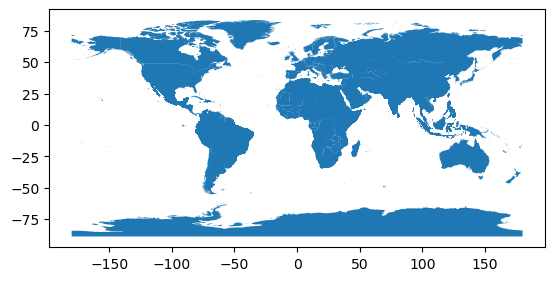

In [88]:
gdf_boundary.plot()

In [49]:

nation_centroid = gdf_boundary.centroid  # Assuming a single geometry for the nation
nation_centroid
gdf_new_point=gdf_boundary
gdf_new_point['geometry']=nation_centroid
gdf_new_point


/var/folders/rj/r4rf6mg57418klvwqvc5dyb40000gn/T/ipykernel_47448/3086181959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nation_centroid = gdf_boundary.centroid  # Assuming a single geometry for the nation


,year,country,counts,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1994.0,Afghanistan,1.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,POINT (66.02647 33.83881)
1,1998.0,Afghanistan,1.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,POINT (66.02647 33.83881)
2,2001.0,Afghanistan,9.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,POINT (66.02647 33.83881)
3,2006.0,Afghanistan,3.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,POINT (66.02647 33.83881)
4,2007.0,Afghanistan,3.0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,POINT (66.02647 33.83881)
...,...,...,...,...,...,...,...,...,...,...,...
753,2020.0,Yemen,2.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,POINT (47.59997 15.90562)
754,2021.0,Yemen,1.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,POINT (47.59997 15.90562)
755,2022.0,Yemen,1.0,249,Yemen,YE,Yemen,YE,34.011327,38.289871,POINT (47.59997 15.90562)
756,2019.0,Zambia,1.0,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,POINT (27.79825 -13.45302)


<Axes: >

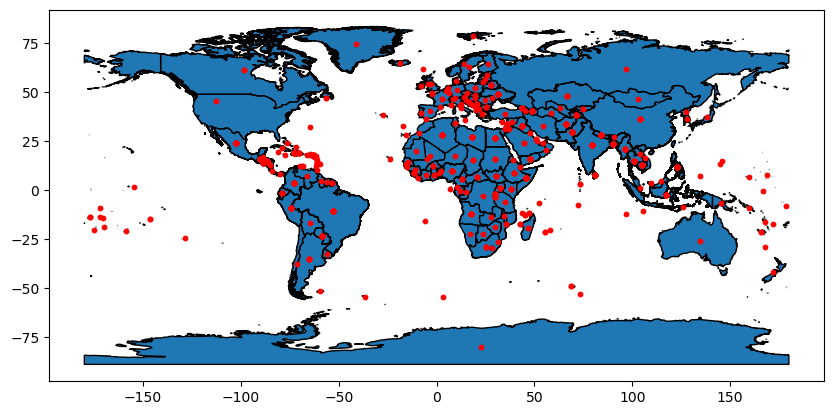

In [54]:
ax = gdf_boundary.plot(edgecolor='black', figsize=(10, 10))

# Plot the centroid
gdf_new_point.plot(ax=ax, color='red', marker='o', markersize=10, label='Centroids')

# # Add labels and legend
# plt.title('Nation Boundary with Centroid')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend()

# # Show the plot
# plt.show()


In [56]:
gdf_new_point.to_file('../vector/worldmap_centroid_deathyearcount.geojson', driver='GeoJSON')

In [62]:
from io import StringIO


In [66]:
df_index_2023=pd.read_csv('../data/press_freedom_index/2023.csv', sep=';')
df_index_2023

,ISO,Score,Rank,Political Context,Rank_Pol,Economic Context,Rank_Eco,Legal Context,Rank_Leg,Social Context,Rank_Soc,Safety,Rank_Saf,Zone,Country_FR,Country_EN,Country_ES,Country_PT,Country_AR,Country_FA,Year (N),Rank N-1,Rank evolution,Score N-1,Score evolution
0,NOR,"95,18",1,"96,54",1,"92,46",1,"94,92",1,"95,98",1,"95,98",3,UE Balkans,Norvège,Norway,Noruega,Noruega,النرويج,نروژ,2023,1,0,"92,65","2,53"
1,IRL,"89,91",2,"93,91",2,"82,11",7,"82,55",19,"94,03",3,"96,94",2,UE Balkans,Irlande,Ireland,Irlanda,Irlanda,أيرلندا,ایرلند,2023,6,4,"88,3","1,61"
2,DNK,"89,48",3,"91,95",4,"85,17",4,"87,5",5,"87,78",17,95,5,UE Balkans,Danemark,Denmark,Dinamarca,Dinamarca,الدنمارك,دانمارک,2023,2,-1,"90,27","-0,79"
3,SWE,"88,15",4,"92,58",3,"86,08",3,"88,74",4,"88,64",14,"84,72",40,UE Balkans,Suède,Sweden,Suecia,Suécia,السويد,سوئد,2023,3,-1,"88,84","-0,69"
4,FIN,"87,94",5,"91,55",5,"83,8",5,"84,86",11,"89,17",13,"90,35",23,UE Balkans,Finlande,Finland,Finlandia,Finlândia,فنلندا,فنلاند,2023,5,0,"88,42","-0,48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TKM,"25,82",176,"23,25",180,"20,39",179,"29,62",165,"9,32",179,"46,53",132,EEAC,Turkménistan,Turkmenistan,Turkmenistán,Turcomenistão,تركمانستان,ترکمنستان,2023,177,1,"25,01","0,81"
176,IRN,"24,81",177,"33,67",168,"30,51",165,"20,17",176,"16,06",178,"23,62",175,MENA,Iran,Iran,Irán,Irã,إيران,ایران,2023,178,1,"23,22","1,59"
177,VNM,"24,58",178,"23,75",179,"17,16",180,"18,4",177,"32,95",163,"30,66",163,Asie-Pacifique,Vietnam,Vietnam,Vietnam,Vietnã,فيتنام,ویتنام,2023,174,-4,"26,11","-1,53"
178,CHN,"22,97",179,"26,06",178,"29,51",167,"17,36",178,"17,07",177,"24,87",173,Asie-Pacifique,Chine,China,China,China,الصين,چین,2023,175,-4,"25,17","-2,2"


In [70]:
numeric_columns = df_index_2023.columns.difference(['ISO', 'Zone', 'Country_FR', 'Country_EN', 'Country_ES', 'Country_PT', 'Country_AR', 'Country_FA'])


In [72]:
def replace_comma(x):
    if isinstance(x, str):
        return float(x.replace(',', '.'))
    else:
        return x

In [89]:
df_index_2023[numeric_columns] = df_index_2023[numeric_columns].applymap(replace_comma)
df_index_2023

,ISO,Score,Rank,Political Context,Rank_Pol,Economic Context,Rank_Eco,Legal Context,Rank_Leg,Social Context,Rank_Soc,Safety,Rank_Saf,Zone,Country_FR,Country_EN,Country_ES,Country_PT,Country_AR,Country_FA,Year (N),Rank N-1,Rank evolution,Score N-1,Score evolution
0,NOR,95.18,1,96.54,1,92.46,1,94.92,1,95.98,1,95.98,3,UE Balkans,Norvège,Norway,Noruega,Noruega,النرويج,نروژ,2023,1,0,92.65,2.53
1,IRL,89.91,2,93.91,2,82.11,7,82.55,19,94.03,3,96.94,2,UE Balkans,Irlande,Ireland,Irlanda,Irlanda,أيرلندا,ایرلند,2023,6,4,88.30,1.61
2,DNK,89.48,3,91.95,4,85.17,4,87.50,5,87.78,17,95.00,5,UE Balkans,Danemark,Denmark,Dinamarca,Dinamarca,الدنمارك,دانمارک,2023,2,-1,90.27,-0.79
3,SWE,88.15,4,92.58,3,86.08,3,88.74,4,88.64,14,84.72,40,UE Balkans,Suède,Sweden,Suecia,Suécia,السويد,سوئد,2023,3,-1,88.84,-0.69
4,FIN,87.94,5,91.55,5,83.80,5,84.86,11,89.17,13,90.35,23,UE Balkans,Finlande,Finland,Finlandia,Finlândia,فنلندا,فنلاند,2023,5,0,88.42,-0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TKM,25.82,176,23.25,180,20.39,179,29.62,165,9.32,179,46.53,132,EEAC,Turkménistan,Turkmenistan,Turkmenistán,Turcomenistão,تركمانستان,ترکمنستان,2023,177,1,25.01,0.81
176,IRN,24.81,177,33.67,168,30.51,165,20.17,176,16.06,178,23.62,175,MENA,Iran,Iran,Irán,Irã,إيران,ایران,2023,178,1,23.22,1.59
177,VNM,24.58,178,23.75,179,17.16,180,18.40,177,32.95,163,30.66,163,Asie-Pacifique,Vietnam,Vietnam,Vietnam,Vietnã,فيتنام,ویتنام,2023,174,-4,26.11,-1.53
178,CHN,22.97,179,26.06,178,29.51,167,17.36,178,17.07,177,24.87,173,Asie-Pacifique,Chine,China,China,China,الصين,چین,2023,175,-4,25.17,-2.20


In [90]:
df_index_2023_sel=df_index_2023[['Year (N)','Country_EN','Score','Rank','Score N-1','Rank N-1','Score evolution']]
df_index_2023_sel

,Year (N),Country_EN,Score,Rank,Score N-1,Rank N-1,Score evolution
0,2023,Norway,95.18,1,92.65,1,2.53
1,2023,Ireland,89.91,2,88.30,6,1.61
2,2023,Denmark,89.48,3,90.27,2,-0.79
3,2023,Sweden,88.15,4,88.84,3,-0.69
4,2023,Finland,87.94,5,88.42,5,-0.48
...,...,...,...,...,...,...,...
175,2023,Turkmenistan,25.82,176,25.01,177,0.81
176,2023,Iran,24.81,177,23.22,178,1.59
177,2023,Vietnam,24.58,178,26.11,174,-1.53
178,2023,China,22.97,179,25.17,175,-2.20


In [93]:
df_freedom=df_index_2023_sel.merge(gdf,left_on='Country_EN',right_on='COUNTRYAFF',how='right')
df_freedom

,Year (N),Country_EN,Score,Rank,Score N-1,Rank N-1,Score evolution,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,2023.0,Afghanistan,39.75,152.0,38.27,156.0,1.48,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,2023.0,Albania,57.86,96.0,56.41,103.0,1.45,2,Albania,AL,Albania,AL,9.625038,3.073540,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41..."
2,2023.0,Algeria,45.74,136.0,45.53,134.0,0.21,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8..."
3,2023.0,United States,71.22,45.0,72.74,42.0,-1.52,4,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.74390 -14.37555, -170.749..."
4,2023.0,Andorra,75.05,37.0,68.79,53.0,6.26,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,2023.0,France,78.72,24.0,78.53,26.0,0.19,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,2023.0,Yemen,32.78,168.0,29.14,169.0,3.64,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,2023.0,Zambia,59.41,87.0,55.40,109.0,4.01,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"MULTIPOLYGON (((30.21302 -14.98172, 30.21916 -..."


In [94]:
gdf_freedom = gpd.GeoDataFrame(
    df_freedom, geometry=df_freedom.geometry, crs="EPSG:4326")

In [97]:
import seaborn as sns

<Axes: >

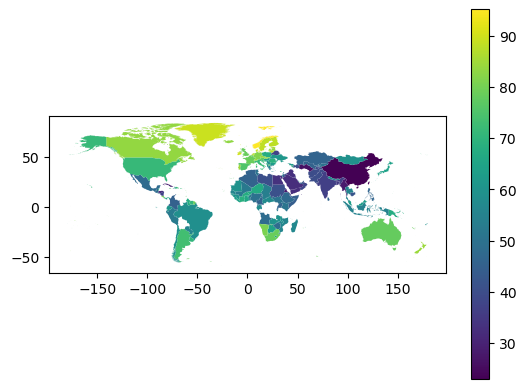

In [99]:
gdf_freedom.plot(column='Score', cmap='viridis', legend=True)

In [96]:
gdf_freedom.to_file('../vector/worldmap_freedom_index.geojson', driver='GeoJSON')